In [16]:
#libreria para manejo de NDARRAY
import numpy as np;
#libreria para graficar
#tipo matlab: pyplot
#objetual: figure, axes
import matplotlib.pyplot as plt
from csv import reader as reader_csv;
import scipy.signal as signal;
import spacy
import scipy.io as sio
import scipy.stats as stats

In [5]:
import os
ruta_carpeta = '../control'

# Obtener la lista de archivos en la carpeta
lista_archivos = os.listdir(ruta_carpeta)
print(lista_archivos)

# Crear una matriz vacía para almacenar los datos
datos_matriz = []  # num_columnas es el número de columnas en los datos

# Iterar a través de cada archivo y agregar los datos a la matriz
for archivo in lista_archivos:
    # Verificar que el archivo sea de tipo .mat
    if archivo.endswith('.mat'):
        # Cargar los datos del archivo
        mat_contents = sio.loadmat(os.path.join(ruta_carpeta, archivo))
        data = mat_contents['data']
        senal_continua = np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]),order='F')
        # Agregar los datos a la matriz
        datos_matriz.append(senal_continua)

['C001R_EP_reposo.mat', 'C002_EP_reposo.mat', 'C004_EP_reposo.mat', 'C005_EP_reposo_Repetido.mat', 'C006_EP_reposo.mat', 'C007_EP_reposo.mat', 'C010_EP_reposo.mat', 'C011_EP_reposo.mat', 'C012_EP_reposo.mat', 'C013_EP_reposo.mat', 'C015_EP_reposo.mat', 'C018_EP_reposo.mat', 'C019_EP_reposo.mat', 'C020_EP_reposo.mat', 'C021_EP_reposo.mat', 'C023_EP_reposo.mat', 'C024_EP_reposo.mat', 'C025_EP_reposo.mat', 'C026_EP_reposo.mat', 'C027_EP_reposo.mat', 'C028_EP_reposo.mat', 'C029_EP_reposo.mat', 'C030_EP_reposo.mat', 'C031_EP_reposo.mat', 'C032_EP_reposo.mat', 'C033R_EP_reposo.mat', 'C034_EP_reposo.mat', 'C036_EP_reposo.mat', 'C037_EP_reposo.mat', 'C040_EP_reposo.mat', 'C041_EP_reposo.mat', 'C042_EP_reposo.mat', 'C044_EP_reposo.mat', 'C045_EP_reposo.mat', 'C046_EP_reposo.mat', 'C049_EP_reposo.mat']


In [5]:
import os
ruta_carpeta = '../control'

# Obtener la lista de archivos en la carpeta
lista_archivos = os.listdir(ruta_carpeta)
print(lista_archivos)

# Crear una matriz vacía para almacenar los datos
datos_matriz = [] # num_columnas es el número de columnas en los datos

# Iterar a través de cada archivo y agregar los datos a la matriz
for archivo in lista_archivos:
    # Verificar que el archivo sea de tipo .mat
    if archivo.endswith('.mat'):
        # Cargar los datos del archivo
        mat_contents = sio.loadmat(os.path.join(ruta_carpeta, archivo))
        data = mat_contents['data']
        senal_continua = np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]),order='F')
        # Agregar los datos a la matriz
        datos_matriz.append(senal_continua)

ruta_carpeta = '../parkinson'
lista_archivos = os.listdir(ruta_carpeta)
datos_parkinson=[]
for archivo in lista_archivos:
    # Verificar que el archivo sea de tipo .mat
    if archivo.endswith('.mat'):
        # Cargar los datos del archivo
        mat_contents = sio.loadmat(os.path.join(ruta_carpeta, archivo))
        data = mat_contents['data']
        senal_continua = np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]),order='F')
        # Agregar los datos a la matriz
        datos_parkinson.append(senal_continua)

['C001R_EP_reposo.mat', 'C002_EP_reposo.mat', 'C004_EP_reposo.mat', 'C005_EP_reposo_Repetido.mat', 'C006_EP_reposo.mat', 'C007_EP_reposo.mat', 'C010_EP_reposo.mat', 'C011_EP_reposo.mat', 'C012_EP_reposo.mat', 'C013_EP_reposo.mat', 'C015_EP_reposo.mat', 'C018_EP_reposo.mat', 'C019_EP_reposo.mat', 'C020_EP_reposo.mat', 'C021_EP_reposo.mat', 'C023_EP_reposo.mat', 'C024_EP_reposo.mat', 'C025_EP_reposo.mat', 'C026_EP_reposo.mat', 'C027_EP_reposo.mat', 'C028_EP_reposo.mat', 'C029_EP_reposo.mat', 'C030_EP_reposo.mat', 'C031_EP_reposo.mat', 'C032_EP_reposo.mat', 'C033R_EP_reposo.mat', 'C034_EP_reposo.mat', 'C036_EP_reposo.mat', 'C037_EP_reposo.mat', 'C040_EP_reposo.mat', 'C041_EP_reposo.mat', 'C042_EP_reposo.mat', 'C044_EP_reposo.mat', 'C045_EP_reposo.mat', 'C046_EP_reposo.mat', 'C049_EP_reposo.mat']


In [6]:
datospromedio=[]
for paciente in datos_matriz:
  promcanales=[]
  for canal in paciente:
    e=canal**2
    prom=np.mean(e)
    promcanales.append(prom)
  datospromedio.append(promcanales)

datospromedio_p=[]
for paciente in datos_parkinson:
  promcanales=[]
  for canal in paciente:
    e=canal**2
    prom=np.mean(e)
    promcanales.append(prom)
  datospromedio_p.append(promcanales)  

In [12]:
import pandas as pd
names = ['C3', 'C1', 'CZ', 'C2', 'C4', 'O1', 'OZ', 'O2']
df=pd.DataFrame(columns=names)
con=1
for paciente in datospromedio:
    df.loc[con]=paciente
    con+=1
df.index.name="Paciente Control"
print(df)

                         C3         C1         CZ         C2         C4  \
Paciente Control                                                          
1                 10.732825  10.492954  11.380075   9.252820  14.865082   
2                  7.983201   8.808905  10.402469   9.827200   8.339491   
3                  7.074337   9.142000  14.374966   7.135363  14.393723   
4                 17.655651  17.458343  19.400215  17.713516  17.952736   
5                  9.255415   9.869245  10.455896  10.914127  11.675996   
6                  6.590055   6.962609   8.109497   6.162442   7.030150   
7                  5.598777   5.474184   6.368502   5.372581   5.164821   
8                 14.275562  13.102420   8.691999   8.622303  13.103186   
9                  4.566518   4.607078   5.813206   5.404811   5.233940   
10                23.583278  27.553899  26.143442  17.341328  15.303060   
11                 8.783733  10.869256  14.714654  14.265100  12.293204   
12                15.6252

In [13]:
names = ['C3', 'C1', 'CZ', 'C2', 'C4', 'O1', 'OZ', 'O2']
dfp=pd.DataFrame(columns=names)
con=1
for paciente in datospromedio_p:
    dfp.loc[con]=paciente
    con+=1
dfp.index.name="Paciente parkinson"
print(dfp)

                           C3         C1         CZ         C2         C4  \
Paciente parkinson                                                          
1                    6.219122   5.630588   5.409817   4.744892   6.045530   
2                    8.997830   6.000801   6.143172   7.392954   8.529217   
3                   19.046051  21.787690  20.989997  20.857644  23.256869   
4                   11.871163  11.035004  12.270158  10.901968  11.297170   
5                   24.287259  25.903265  36.585976  29.853850  28.276088   
6                    8.101208   6.562124   6.994337   6.376014   7.892362   
7                    5.346474   5.420594   6.077195  12.080843   7.394587   
8                    6.078615   6.699329   8.834439   7.420552   5.648871   
9                    4.790905   7.004286   4.794615   4.687043   4.077471   
10                  11.829369  11.995128  15.316873  11.444447   9.966158   
11                  11.723026  13.045671  18.320266  12.830111  15.665275   

In [29]:
from statsmodels.stats.diagnostic import lilliefors

def check_normality(data):
    '''Check if the distribution is normal.'''
    
    # --- >>> START stats <<< ---
    # Graphical test: if the data lie on a line, they are pretty much
    # normally distributed
    _ = stats.probplot(data, plot=plt)
    plt.show()

    pVals = pd.Series()
    # The scipy normaltest is based on D-Agostino and Pearsons test that
    # combines skew and kurtosis to produce an omnibus test of normality.
    _, pVals['Omnibus']    = stats.normaltest(data)

    # Shapiro-Wilk test
    _, pVals['Shapiro-Wilk']    = stats.shapiro(data)
       
    print('p-values for all {0} data points: ----------------'.format(len(data)))
    print(pVals)
    print('p-values for the first 100 data points: ----------------')
    
    if pVals['Omnibus'] > 0.05:
        print('Data are normally distributed')
    elif pVals['Shapiro-Wilk'] > 0.05:
        print('Data are normally distributed')
    else:
        print("Data arent normally distribuited")
    # --- >>> STOP stats <<< ---
    
    return pVals['Shapiro-Wilk']

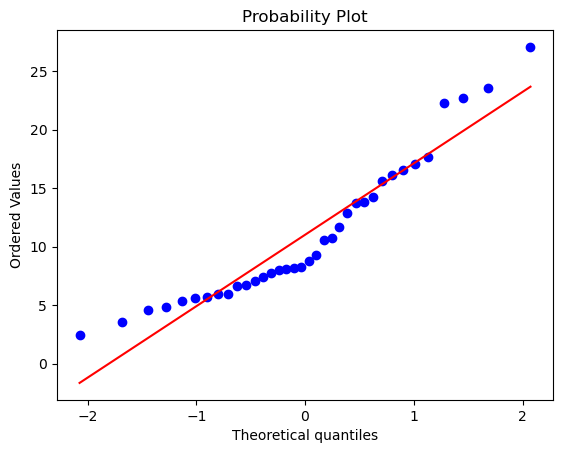

p-values for all 36 data points: ----------------
Omnibus         0.058516
Shapiro-Wilk    0.006252
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed


C:\Users\MIGUEL\AppData\Local\Temp\ipykernel_58520\1386992940.py:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pVals = pd.Series()


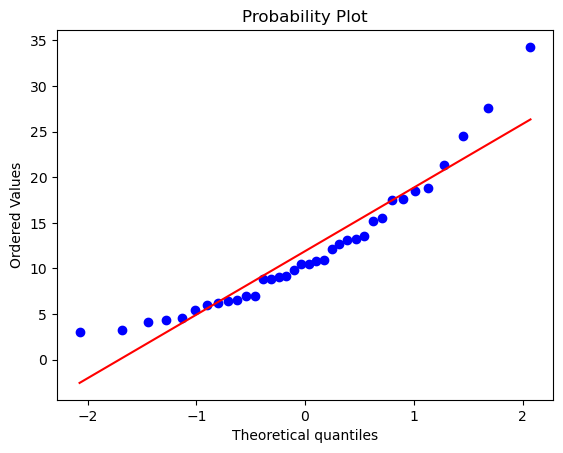

C:\Users\MIGUEL\AppData\Local\Temp\ipykernel_58520\1386992940.py:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pVals = pd.Series()


p-values for all 36 data points: ----------------
Omnibus         0.002250
Shapiro-Wilk    0.003954
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


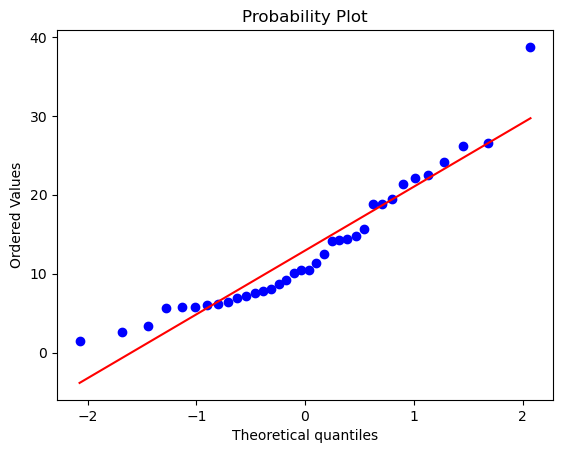

p-values for all 36 data points: ----------------
Omnibus         0.010169
Shapiro-Wilk    0.008902
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


C:\Users\MIGUEL\AppData\Local\Temp\ipykernel_58520\1386992940.py:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pVals = pd.Series()


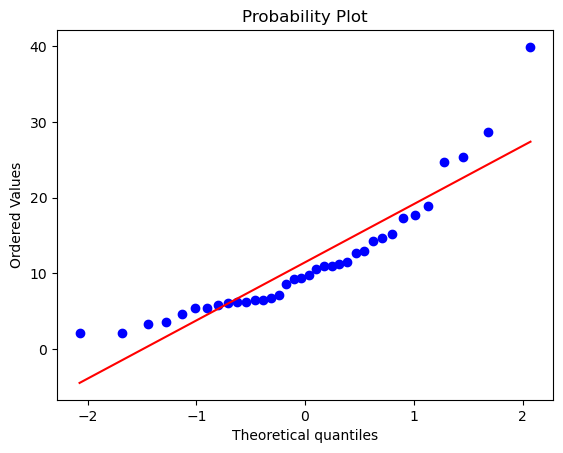

p-values for all 36 data points: ----------------
Omnibus         0.000039
Shapiro-Wilk    0.000197
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


C:\Users\MIGUEL\AppData\Local\Temp\ipykernel_58520\1386992940.py:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pVals = pd.Series()


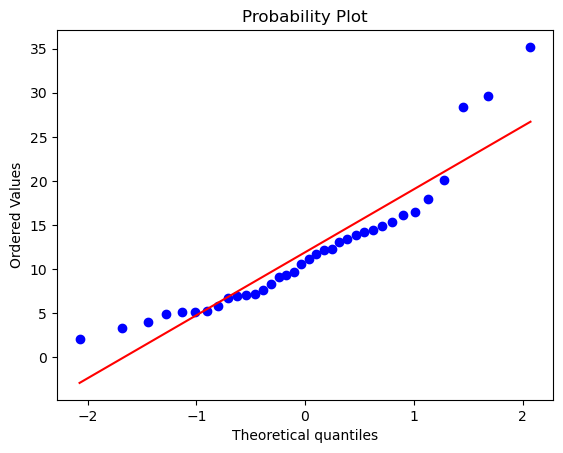

p-values for all 36 data points: ----------------
Omnibus         0.000401
Shapiro-Wilk    0.000800
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


C:\Users\MIGUEL\AppData\Local\Temp\ipykernel_58520\1386992940.py:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pVals = pd.Series()


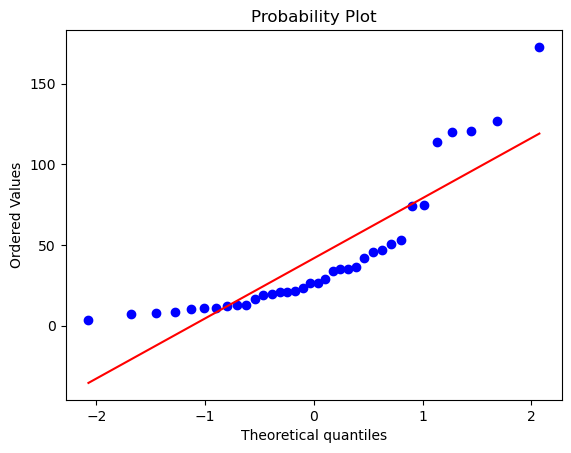

C:\Users\MIGUEL\AppData\Local\Temp\ipykernel_58520\1386992940.py:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pVals = pd.Series()


p-values for all 36 data points: ----------------
Omnibus         0.000124
Shapiro-Wilk    0.000006
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


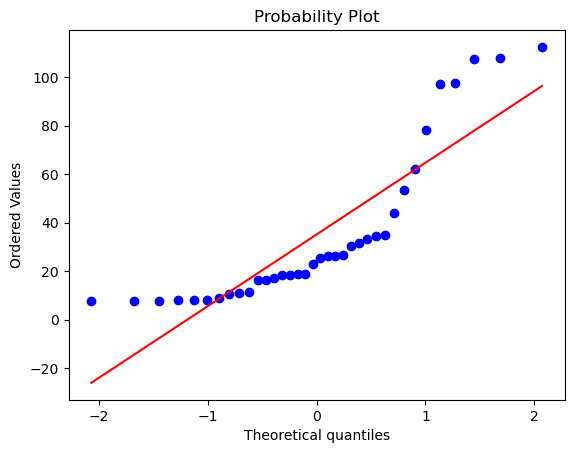

C:\Users\MIGUEL\AppData\Local\Temp\ipykernel_58520\1386992940.py:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pVals = pd.Series()


p-values for all 36 data points: ----------------
Omnibus         0.003589
Shapiro-Wilk    0.000004
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


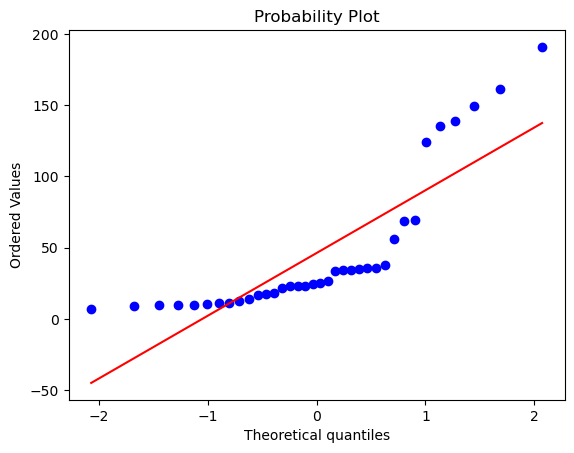

p-values for all 36 data points: ----------------
Omnibus         3.132373e-04
Shapiro-Wilk    5.307714e-07
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


C:\Users\MIGUEL\AppData\Local\Temp\ipykernel_58520\1386992940.py:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pVals = pd.Series()


In [30]:
for i in names: #Se aplica la prueba de normalidad a cada canal
    c=df.loc[:,i]
    x=check_normality(c)

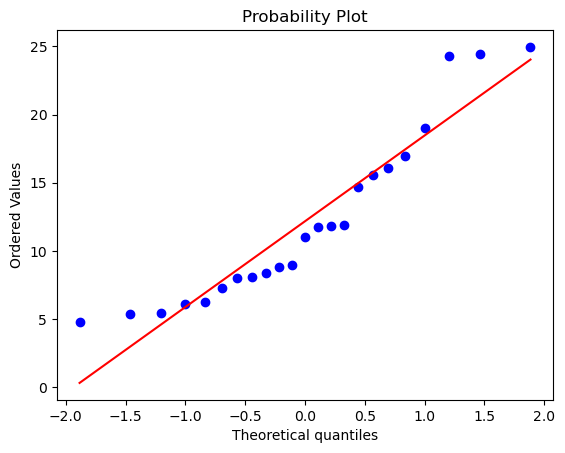

p-values for all 23 data points: ----------------
Omnibus         0.194145
Shapiro-Wilk    0.014392
dtype: float64
p-values for the first 100 data points: ----------------
Data are normally distributed


C:\Users\MIGUEL\AppData\Local\Temp\ipykernel_58520\1386992940.py:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pVals = pd.Series()


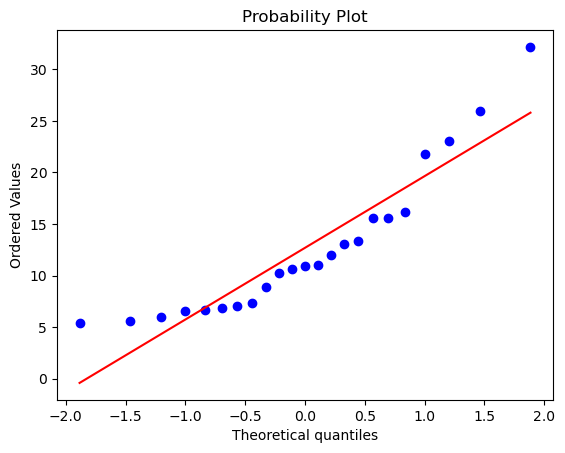

p-values for all 23 data points: ----------------
Omnibus         0.015444
Shapiro-Wilk    0.004522
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


C:\Users\MIGUEL\AppData\Local\Temp\ipykernel_58520\1386992940.py:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pVals = pd.Series()


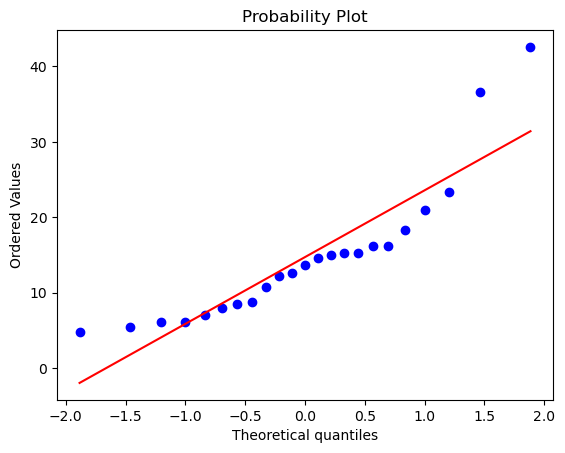

C:\Users\MIGUEL\AppData\Local\Temp\ipykernel_58520\1386992940.py:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pVals = pd.Series()


p-values for all 23 data points: ----------------
Omnibus         0.000374
Shapiro-Wilk    0.000910
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


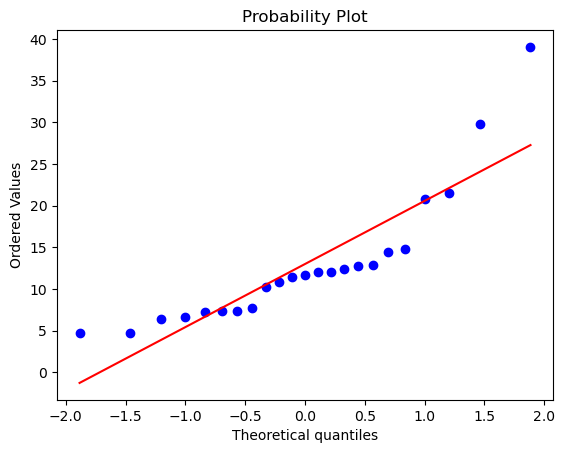

C:\Users\MIGUEL\AppData\Local\Temp\ipykernel_58520\1386992940.py:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pVals = pd.Series()


p-values for all 23 data points: ----------------
Omnibus         0.000084
Shapiro-Wilk    0.000312
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


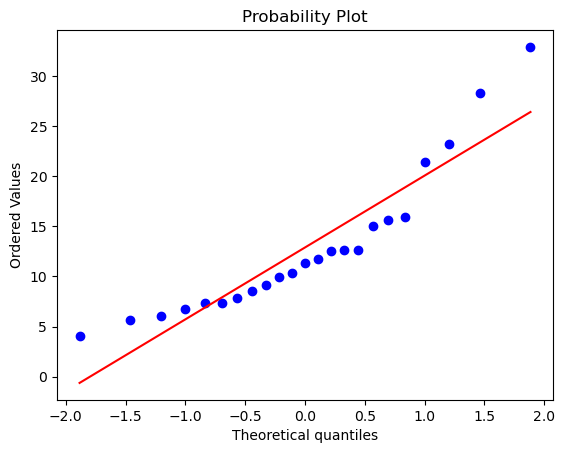

C:\Users\MIGUEL\AppData\Local\Temp\ipykernel_58520\1386992940.py:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pVals = pd.Series()


p-values for all 23 data points: ----------------
Omnibus         0.008114
Shapiro-Wilk    0.005323
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


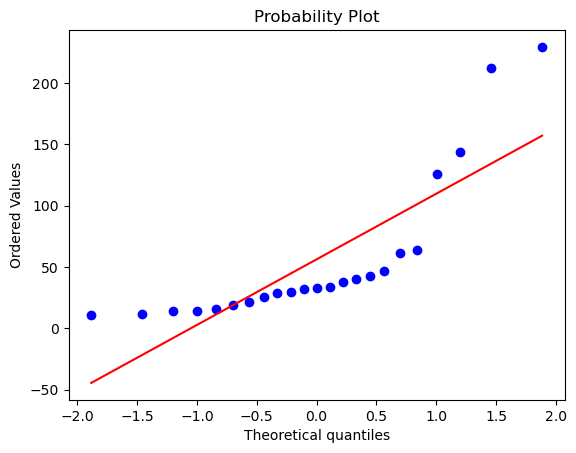

C:\Users\MIGUEL\AppData\Local\Temp\ipykernel_58520\1386992940.py:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pVals = pd.Series()


p-values for all 23 data points: ----------------
Omnibus         0.000158
Shapiro-Wilk    0.000010
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


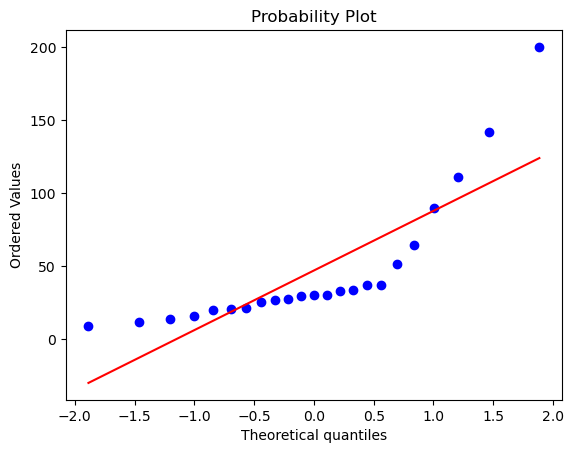

C:\Users\MIGUEL\AppData\Local\Temp\ipykernel_58520\1386992940.py:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pVals = pd.Series()


p-values for all 23 data points: ----------------
Omnibus         0.000018
Shapiro-Wilk    0.000017
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


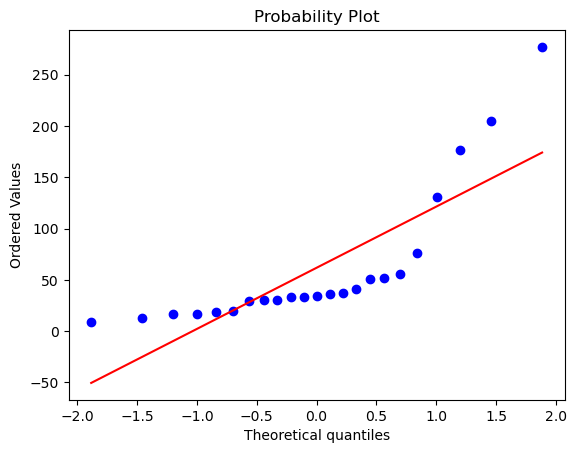

p-values for all 23 data points: ----------------
Omnibus         0.000057
Shapiro-Wilk    0.000009
dtype: float64
p-values for the first 100 data points: ----------------
Data arent normally distribuited


C:\Users\MIGUEL\AppData\Local\Temp\ipykernel_58520\1386992940.py:12: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pVals = pd.Series()


In [31]:
for i in names:
    c=dfp.loc[:,i]
    x=check_normality(c)

In [32]:
from scipy.stats import mannwhitneyu

In [39]:
stat, p = mannwhitneyu(datospromedio, datospromedio_p)
con=0
for i in p:
    print('Statistics=%.3f, p=%.3f for channel %s' % (stat[con], i,names[con]))
    con+=1
    #interpret
    alpha = 0.05
    if i > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

Statistics=360.000, p=0.406 for channel C3
Same distribution (fail to reject H0)
Statistics=377.000, p=0.571 for channel C1
Same distribution (fail to reject H0)
Statistics=366.000, p=0.460 for channel CZ
Same distribution (fail to reject H0)
Statistics=337.000, p=0.234 for channel C2
Same distribution (fail to reject H0)
Statistics=376.000, p=0.560 for channel C4
Same distribution (fail to reject H0)
Statistics=344.000, p=0.280 for channel O1
Same distribution (fail to reject H0)
Statistics=313.000, p=0.118 for channel OZ
Same distribution (fail to reject H0)
Statistics=321.000, p=0.151 for channel O2
Same distribution (fail to reject H0)


In [37]:
stat

array([360., 377., 366., 337., 376., 344., 313., 321.])